# Master M2 MVA 2017/2018 - Graphical models - HWK 1

Sofiane Horache

## 1  Learning in discrete graphical models


## 2 Linear classification




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [25]:
print(pd.__version__)

0.19.2


In [40]:
# Data for training
dataA = pd.read_csv('./classification_data_HWK1/classificationA.train', sep='\t', header=None).as_matrix()
dataB = pd.read_csv('./classification_data_HWK1/classificationB.train', sep='\t', header=None).as_matrix()
dataC = pd.read_csv('./classification_data_HWK1/classificationC.train', sep='\t', header=None).as_matrix()
# Data for the test
testA = pd.read_csv('./classification_data_HWK1/classificationA.test',sep='\t', header=None).as_matrix()
testB = pd.read_csv('./classification_data_HWK1/classificationB.test',sep='\t', header=None).as_matrix()
testC = pd.read_csv('./classification_data_HWK1/classificationC.test',sep='\t', header=None).as_matrix()


In [65]:
def separ(data):
    """this function separates the data above in a matrix X and a vector y"""
    return data[:,:-1], data[:,-1]



### Generative model LDA

#### a) MLE of LDA

#### b) conditional distribution $p(y=1|x)$

#### c) implementation

In [ ]:
#function of conditionnal distribution
def cond_distrib(w, b, pi):
    
    return 

In [102]:
# computation of estimated parameters
def MLE_LDA(data):
    X_train, y_train = separ(data)
    n = y_train.shape[0]
    mu1 = np.sum(X_train[y_train==1],axis=0)/n
    mu0 = np.sum(X_train[y_train==0],axis=0)/n
    mu = np.sum(X_train,axis=0)/n
    pi = float(np.count_nonzero(y_train))/n
    sigma = np.zeros((2,2))
    Xc = X_train - mu
    for x in Xc:
        sigma += x.dot(x.T)
    sigma /= n
    #sigma = np.linalg.inv(sigma)
    #w = sigma.dot(mu1 -mu0)
    #b = mu0.dot(sigma.dot(mu0))-mu1.dot(sigma.dot(mu1))
    return mu0, mu1, sigma
mu0, mu1, sigma = MLE_LDA(dataA)
print(mu0)
print(mu1)
print(sigma)

[ 1.93313964 -0.595916  ]
[-0.89744001  0.28868067]
[[ 10.6930188  10.6930188]
 [ 10.6930188  10.6930188]]


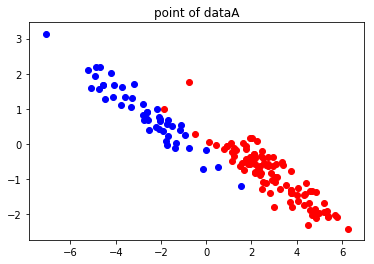

In [97]:
def plot_data(data,title):
    X_train, y_train = separ(data)
    x1 = X_train[y_train==1][:,0]
    y1 = X_train[y_train==1][:,1]
    x0 = X_train[y_train==0][:,0]
    y0 = X_train[y_train==0][:,1]
    plt.scatter(x0,y0,c='r')
    plt.scatter(x1,y1,c='b')
    plt.title(title)
plot_data(dataA,"point of dataA")